In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


## Question 1

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from functools import reduce
from math import sqrt, exp
from scipy.stats import norm

%matplotlib inline

# Number of different shares in our portfolio
AAPL_share = 200 
BAC_share = 1000
KO_share = 500
DAL_share = 1000
CCL_share = 1000

In [3]:
from pandas_datareader.data import DataReader

def get_data_for_multiple_stocks(tickers,start_date='2019-08-01',end_date= '2020-08-01'):
    #define helper function here
    #
    
    
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        
        # get the data for the specific ticker
        s = DataReader(ticker, 'yahoo', start_date, end_date)
      
        s.insert(0, "Ticker", ticker)  #insert ticker column so you can reference better later
        
        s['Prev Close'] = s['Adj Close'].shift(1)
        s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
        s['perc_return'] = (s['Adj Close']/s['Prev Close'])
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [4]:
tickers = ['AAPL','BAC','KO','DAL','CCL']
AAPL = get_data_for_multiple_stocks(tickers,start_date='2019-01-01',end_date= '2020-08-31')['AAPL']
BAC = get_data_for_multiple_stocks(tickers,start_date='2019-01-01',end_date= '2020-08-31')['BAC']
KO = get_data_for_multiple_stocks(tickers,start_date='2019-01-01',end_date= '2020-08-31')['KO']
DAL = get_data_for_multiple_stocks(tickers,start_date='2019-01-01',end_date= '2020-08-31')['DAL']
CCL = get_data_for_multiple_stocks(tickers,start_date='2019-01-01',end_date= '2020-08-31')['CCL']


CCL.tail()

,Ticker,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
Date,,,,,,,,,,
2020-08-25,CCL,16.389999,15.330000,16.290001,15.890000,38551500.0,15.890000,16.139999,-0.015611,0.984511
2020-08-26,CCL,15.780000,15.190000,15.700000,15.280000,24425200.0,15.280000,15.890000,-0.039145,0.961611
2020-08-27,CCL,16.680000,15.650000,15.670000,16.120001,48079400.0,16.120001,15.280000,0.053516,1.054974
2020-08-28,CCL,17.340000,16.230000,16.580000,17.209999,51079100.0,17.209999,16.120001,0.065430,1.067618
2020-08-31,CCL,17.340000,16.469999,17.330000,16.480000,43771700.0,16.480000,17.209999,-0.043343,0.957583


In [5]:
# Transform Date from integer to date type
AAPL = AAPL.reset_index()
AAPL['Date'] = pd.to_datetime(AAPL['Date'], infer_datetime_format=True)
BAC = BAC.reset_index()
BAC['Date'] = pd.to_datetime(BAC['Date'], infer_datetime_format=True)
KO = KO.reset_index()
KO['Date'] = pd.to_datetime(KO['Date'], infer_datetime_format=True)
DAL = DAL.reset_index()
DAL['Date'] = pd.to_datetime(DAL['Date'], infer_datetime_format=True)
CCL = CCL.reset_index()
CCL['Date'] = pd.to_datetime(CCL['Date'], infer_datetime_format=True)

CCL.head()

,Date,Ticker,High,Low,Open,Close,Volume,Adj Close,Prev Close,log_return,perc_return
0,2018-12-31,CCL,49.369999,48.500000,48.900002,49.299999,3970700.0,46.795429,NaN,NaN,NaN
1,2019-01-02,CCL,50.099998,48.619999,48.939999,49.849998,3926800.0,47.317493,46.795429,0.011095,1.011156
2,2019-01-03,CCL,49.410000,47.330002,49.270000,47.369999,6128200.0,44.963486,47.317493,-0.051029,0.950251
3,2019-01-04,CCL,50.419998,48.330002,48.439999,50.049999,4568300.0,47.507336,44.963486,0.055033,1.056576
4,2019-01-07,CCL,51.240002,50.330002,51.009998,50.639999,4694900.0,48.067360,47.507336,0.011719,1.011788


In [6]:
AAPL['Value'] = AAPL_share * AAPL['Adj Close']
BAC['Value'] = BAC_share * BAC['Adj Close']
KO['Value'] = KO_share * KO['Adj Close']
DAL['Value'] = DAL_share * DAL['Adj Close']
CCL['Value'] = CCL_share * CCL['Adj Close']
AAPL['Adj_PortValue'] = AAPL_share * AAPL['Adj Close'] + BAC_share * BAC['Adj Close'] + KO_share * KO['Adj Close'] + DAL_share * DAL['Adj Close'] + CCL_share * CCL['Adj Close']
AAPL['Prev_PortValue'] = AAPL['Adj_PortValue'].shift(1)


df = AAPL.loc[:,['Date', 'Adj_PortValue','Prev_PortValue' ]]
df.head()

,Date,Adj_PortValue,Prev_PortValue
0,2018-12-31,148731.446457,NaN
1,2019-01-02,149554.274368,148731.446457
2,2019-01-03,141578.850174,149554.274368
3,2019-01-04,147944.003677,141578.850174
4,2019-01-07,148233.923340,147944.003677


In [7]:
# Calculate log returns
df['log_return'] = np.log(df['Adj_PortValue']/df['Prev_PortValue'])
df.head(n=5)

,Date,Adj_PortValue,Prev_PortValue,log_return
0,2018-12-31,148731.446457,NaN,NaN
1,2019-01-02,149554.274368,148731.446457,0.005517
2,2019-01-03,141578.850174,149554.274368,-0.054803
3,2019-01-04,147944.003677,141578.850174,0.043977
4,2019-01-07,148233.923340,147944.003677,0.001958


In [8]:
# Set complement of the VaR level: 95% and 99%
pVaR = np.array([0.05, 0.01])

In [9]:
# For each row, use previous 250 rows' (return series) to calculate VaR.
from copy import deepcopy
df_VaR = deepcopy(df)

for i in range(0, len(df_VaR)):
    past_250 = df_VaR.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        df_VaR.loc[i, 'VaR_99_HS'] = past_250.quantile(0.01)       
    else:
        df_VaR.loc[i, 'VaR_99_HS'] = np.NaN

In [10]:
from copy import deepcopy
df_ES = deepcopy(df)

significance = np.array([0.05, 0.01]) # Significance level
confidence = np.array([0.95, 0.99]) # Confidence level

for i in range(0, len(df_ES)):
    past_250 = df_ES.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250) # Number of past days
    if T_days == 250:
        VaR = [past_250.quantile(alpha) for alpha in significance] # VaR of 95% and 99%
        rt0 = filter(lambda x: x<VaR[0], past_250)
        rt1 = filter(lambda x: x<VaR[1], past_250)
        df_ES.loc[i, 'ES_99_HS'] = sum(rt1)/(T_days*(1-confidence[1])) 
    else:
        df_ES.loc[i, 'ES_99_HS'] = np.NaN

## Question 2

In [11]:
# For each row, use previous 250 rows' (return series) to calculate VaR.
## note: the VaR 95 and 99 are given in log %VaR. 

from copy import deepcopy
df_VaR = deepcopy(df_VaR)

z_alpha = norm.ppf(pVaR, loc=0, scale=1) # z-score

for i in range(0, len(df_VaR)):
    past_250 = df_VaR.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        df_VaR.loc[i, 'VaR_99_PARA'] = mu+sigma*z_alpha[1]        
    else:
        df_VaR.loc[i, 'VaR_99_PARA'] = np.NaN

In [12]:
# For each row, use previous 250 rows' (return series) to calculate Expected Shortfall ES%.
from copy import deepcopy
df_ES = deepcopy(df_ES)

alpha = np.array([0.05, 0.01]) # Significance level
confidence = np.array([0.95, 0.99]) # Confidence level

for i in range(0, len(df_ES)):
    past_250 = df_ES.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        df_ES.loc[i, 'ES_99_PARA'] = mu+sigma*norm.pdf(norm.ppf(confidence[1], loc=0, scale=1), loc=0, scale=1)/(1-confidence[1]) 
    else:
        df_ES.loc[i, 'ES_99_PARA'] = np.NaN

# Question 3

In [13]:
# For each row, use previous 250 rows' (return series) to calculate VaR.
## note: the VaR 95 and 99 are given in log %VaR. 

from copy import deepcopy
df_VaR = deepcopy(df_VaR)

z_alpha = norm.ppf(pVaR, loc=0, scale=1) # z-score

for i in range(0, len(df_VaR)):
    past_250 = df_VaR.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sterr = past_250.std()
        T = 1
        new_mu = (mu-(sterr**2)/2)*T
        new_sterr = sterr*sqrt(T)
        np.random.seed(12345) #must set to exactly 12345
        alpha = 0.01 # Significance level
        N_simulations = 10000 # Number of Monte Carlo simulations
        log_returns = np.random.normal(loc=new_mu, scale=new_sterr, size=N_simulations)
        log_returns = sorted(log_returns, reverse=False)
        df_VaR.loc[i, 'VaR_99_MC'] =  log_returns[int(N_simulations*alpha)]       
    else:
        df_VaR.loc[i, 'VaR_99_MC'] = np.NaN

In [14]:
df_VaR.dropna(inplace=True)
df_VaR.head()

,Date,Adj_PortValue,Prev_PortValue,log_return,VaR_99_HS,VaR_99_PARA,VaR_99_MC
250,2019-12-27,185413.459015,185901.429367,-0.002628,-0.031235,-0.024522,-0.024968
251,2019-12-30,184540.360641,185413.459015,-0.004720,-0.031235,-0.024490,-0.024936
252,2019-12-31,184387.136841,184540.360641,-0.000831,-0.031235,-0.024535,-0.024981
253,2020-01-02,185986.630630,184387.136841,0.008637,-0.031131,-0.022953,-0.023371
254,2020-01-03,182593.395615,185986.630630,-0.018413,-0.031131,-0.022270,-0.022672


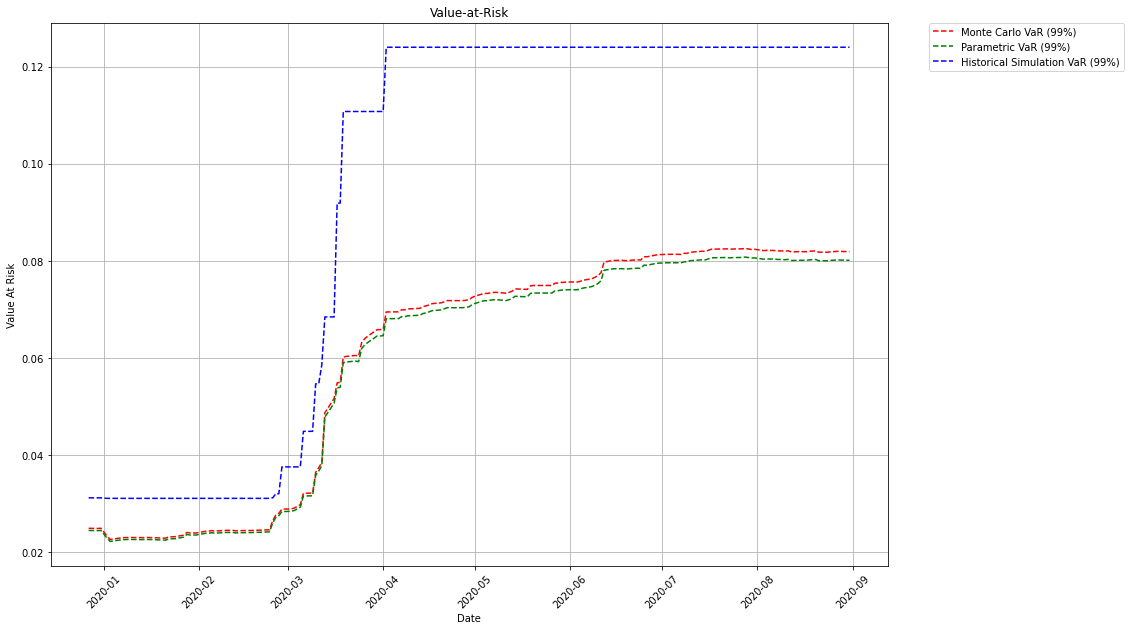

In [15]:
# Plot VaR_99
plt.figure(figsize=(15,10))
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_MC'], 'r--', label='Monte Carlo VaR (99%)')
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_PARA'], 'g--', label='Parametric VaR (99%)')
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_HS'], 'b--', label='Historical Simulation VaR (99%)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk')
plt.show()

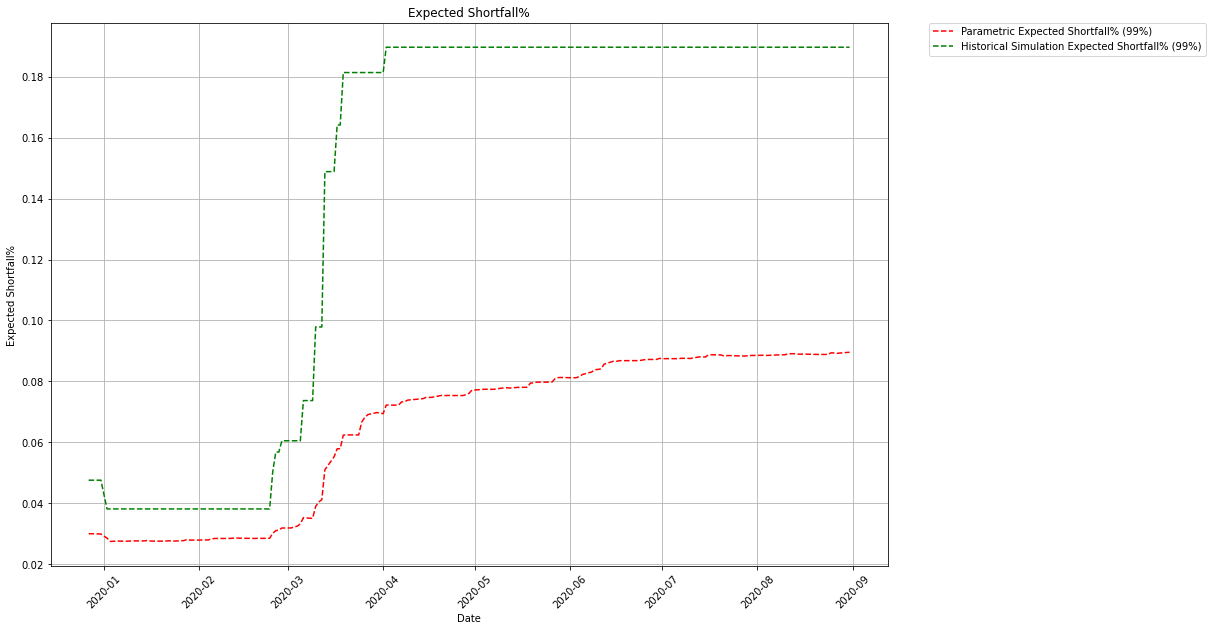

In [16]:
# Plot ES_99
plt.figure(figsize=(15,10))
plt.plot(df_ES['Date'], df_ES['ES_99_PARA'], 'r--', label='Parametric Expected Shortfall% (99%)')
plt.plot(df_ES['Date'], -df_ES['ES_99_HS'], 'g--', label='Historical Simulation Expected Shortfall% (99%)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Expected Shortfall%')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Expected Shortfall%')
plt.show()

### Question 4


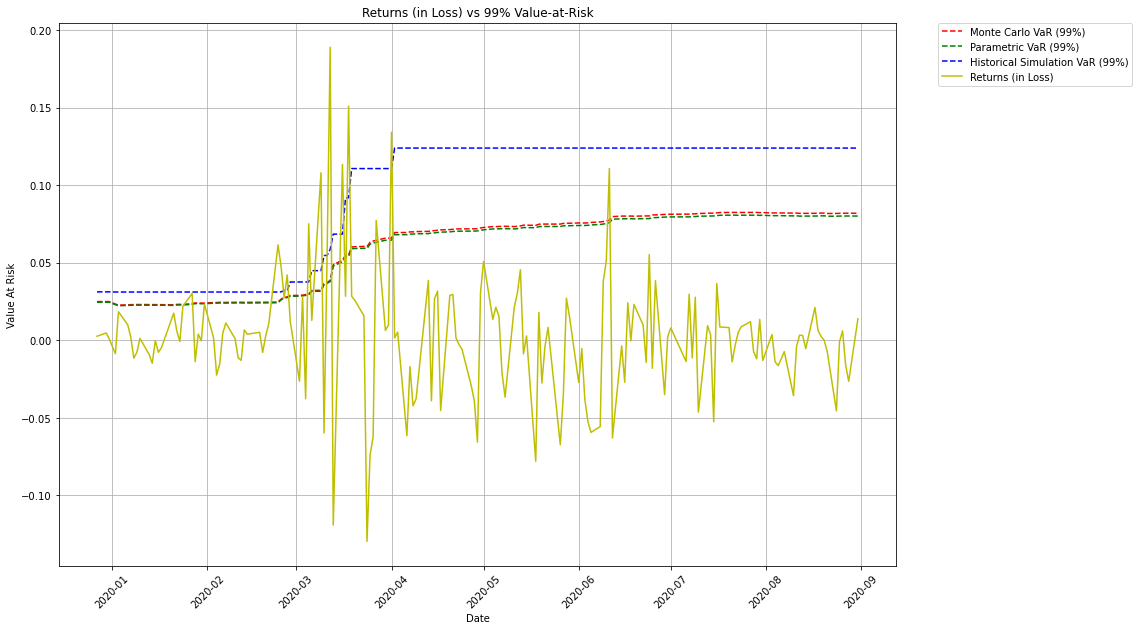

In [17]:
# Plot VaR_99 vs Returns
plt.figure(figsize=(15,10))
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_MC'], 'r--', label='Monte Carlo VaR (99%)')
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_PARA'], 'g--', label='Parametric VaR (99%)')
plt.plot(df_VaR['Date'], -df_VaR['VaR_99_HS'], 'b--', label='Historical Simulation VaR (99%)')
plt.plot(df_VaR['Date'], -df_VaR['log_return'], 'y-', label='Returns (in Loss)')
plt.grid(True)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Returns (in Loss) vs 99% Value-at-Risk')
plt.show()

In [18]:
# Zoom in: from '2020-03' to '2020-09'
start_date = '2020-03-01'
end_date = '2020-08-31'
mask1 = (df_VaR['Date'] > start_date) & (df_VaR['Date'] <= end_date)
mask2 = (df_VaR['Date'] > start_date) & (df_VaR['Date'] <= end_date)
zoomin_1 = df_VaR[mask1]
zoomin_2 = df_VaR[mask2]

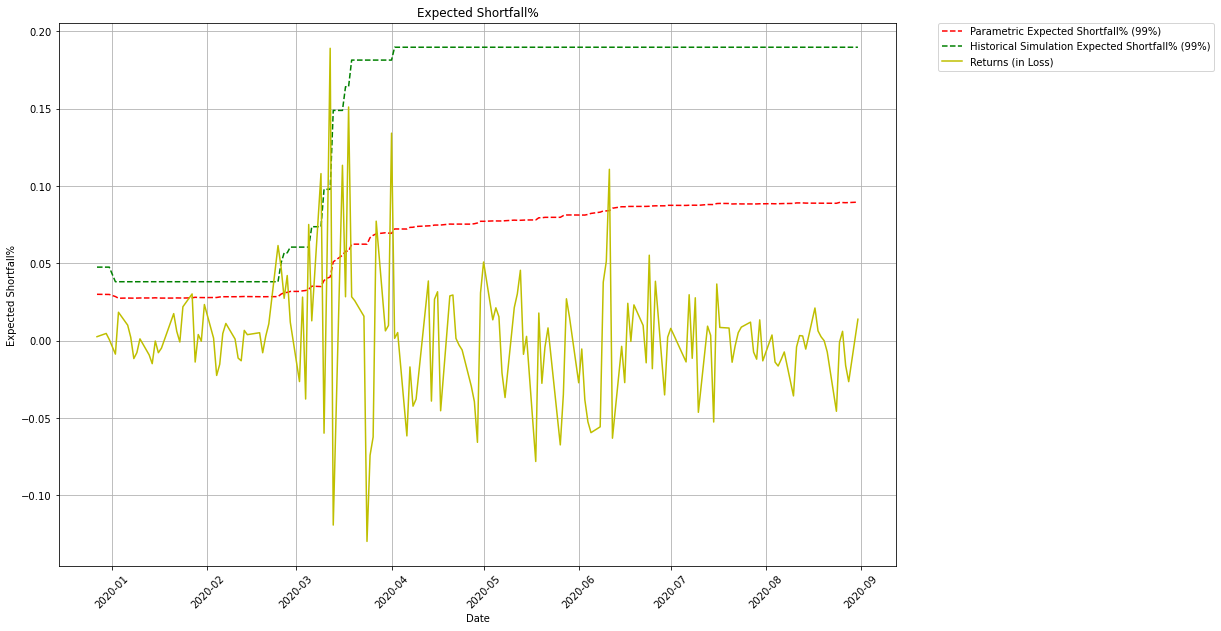

In [19]:
# Plot ES_99
plt.figure(figsize=(15,10))
plt.plot(df_ES['Date'], df_ES['ES_99_PARA'], 'r--', label='Parametric Expected Shortfall% (99%)')
plt.plot(df_ES['Date'], -df_ES['ES_99_HS'], 'g--', label='Historical Simulation Expected Shortfall% (99%)')
plt.plot(df_VaR['Date'], -df_VaR['log_return'], 'y-', label='Returns (in Loss)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Expected Shortfall%')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Expected Shortfall%')
plt.show()

### From the graph we can see that the VaR and Expected Shortfall plotted using historical simulation is the highest and parametric is the lowest. Monte Carlo VaR nearly overlaps the parametric graph. In my opinion, Historical Simulation has the highest VaR, which means volatility is the highest and thus the worst model for comparing VaR and expected shortfall. Parametric is the best in this situation for comparing the expected shortfall due to its lower volatility. For VaR, Monte Carlo method would be the best as Parametric approach assumes a normal distribution in price movement whereas for monte carlo method it runs on a few thousand simulation to get the VaR value which is more realistic in terms of the approach to calculating VaR 

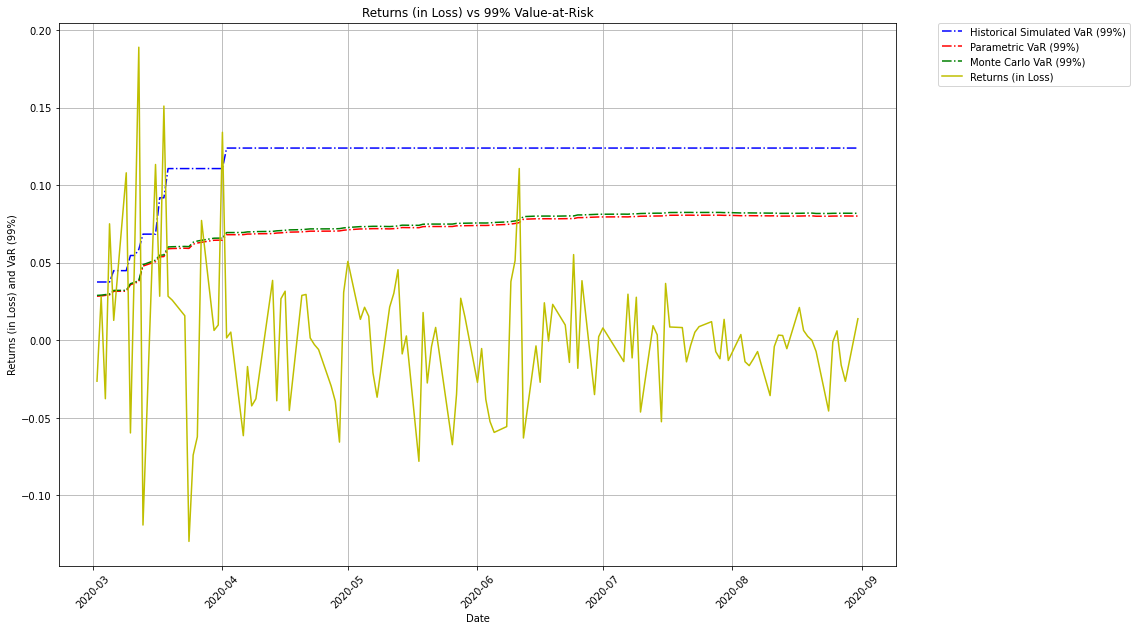

In [20]:
# Plot: Returns vs VaR 99%
plt.figure(figsize=(15,10))
plt.plot(zoomin_1['Date'], -zoomin_1['VaR_99_HS'], 'b-.', label='Historical Simulated VaR (99%)')
plt.plot(zoomin_2['Date'], -zoomin_2['VaR_99_PARA'], 'r-.', label='Parametric VaR (99%)')
plt.plot(zoomin_2['Date'], -zoomin_2['VaR_99_MC'], 'g-.', label='Monte Carlo VaR (99%)')
plt.plot(zoomin_1['Date'], -zoomin_1['log_return'], 'y-', label='Returns (in Loss)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Returns (in Loss) and VaR (99%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Returns (in Loss) vs 99% Value-at-Risk')
plt.show()

In [21]:
# A VaR failure or violation happens when the VaR is exceeded by negative return (i.e., loss). 
# Select and Zoom in on dates with exceptions.
exception_parametric_date = df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']]['Date']
exception_historical_date = df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']]['Date']
exception_monte_carlo = df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']]['Date']
exception_date = pd.concat([exception_parametric_date,exception_historical_date]).drop_duplicates().reset_index(drop=True)

In [22]:
exception_parametric = df_VaR[df_VaR['Date'].isin(exception_date)]
exception_historical = df_VaR[df_VaR['Date'].isin(exception_date)]
exception_monte_carlo = df_VaR[df_VaR['Date'].isin(exception_date)]

In [23]:
# Statistical tests for VaR backtesting
# Compare the different test results for the various models at the 99% VaR levels.
observed_level = 1 - len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])
expected = observations*0.01

print("Parametric VaR 99%") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

Parametric VaR 99%
VaR level: 0.99
Observed level: 0.9181286549707602
Observations: 171
Failures: 14
Expected: 1.71


In [24]:
observed_level = 1 - len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])
expected = observations*0.01

print("Historical Simulation VaR 99%") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

Historical Simulation VaR 99%
VaR level: 0.99
Observed level: 0.9415204678362573
Observations: 171
Failures: 10
Expected: 1.71


In [25]:
observed_level = 1 - len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])
expected = observations*0.01

print("Monte Carlo VaR 99%") 
print("VaR level: %s" %(0.99))
print("Observed level: %s" %(observed_level))
print("Observations: %s" %(observations))
print("Failures: %s" %(failures)) 
print("Expected: %s" %(expected))

Monte Carlo VaR 99%
VaR level: 0.99
Observed level: 0.9239766081871346
Observations: 171
Failures: 13
Expected: 1.71


In [26]:
# Use equations to get p value of 95% VaR
# Bernoulli Test for VaR models
from scipy.stats import binom

observed_level = 1 - len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_99 = 1-binom.cdf(failures, observations, 0.01)
print("P-value of Parametric VaR 95%: ", p_value_99)
if(p_value_99 < backtesting_alpha):
    print("Reject null hypothesis")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution")

P-value of Parametric VaR 95%:  2.935527376735081e-10
Reject null hypothesis


In [27]:
observed_level = 1 - len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_99 = 1-binom.cdf(failures, observations, 0.01)
print("P-value of Historical Simulation VaR 95%: ", p_value_99)
if(p_value_99 < backtesting_alpha):
    print("Reject null hypothesis")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution")

P-value of Historical Simulation VaR 95%:  1.523321364493846e-06
Reject null hypothesis


In [28]:
observed_level = 1 - len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected
backtesting_alpha = 0.05 #backtesting confidence interval
p_value_99 = 1-binom.cdf(failures, observations, 0.01)
print("P-value of Monte Carlo VaR 95%: ", p_value_99)
if(p_value_99 < backtesting_alpha):
    print("Reject null hypothesis")
else:
    print(f"Not enough evidence to reject null at {backtesting_alpha} backtesting significance level under binomial distribution")

P-value of Monte Carlo VaR 95%:  2.7985845862943393e-09
Reject null hypothesis


In [29]:
# Unconditional coverage testing for Parametric VaR 99%
from math import log, pow

observed_level = 1 - len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_PARA']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected

LR_UC = -2*log(pow(0.01, failures)*pow(0.99, observations-failures)) + \
        2*log(pow(1-failures/observations, observations-failures)*pow(failures/observations, failures))

In [30]:
# Independence test of VaR 99%
from copy import deepcopy
df_99 = deepcopy(df_VaR)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_99['ind_t'] = df_99.apply(lambda row: 1 if row['VaR_99_PARA']>row['log_return'] else 0, axis=1)
df_99['ind_t1'] = df_99['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_99['ind_00'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_10'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_99['ind_01'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_11'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_99.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures
N00, N10, N01, N11 = df_99[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1
# pC = Probability of having a failure on period t
p01 = N01/(N00+N01)
p11 = N11/(N10+N11)
pC = (N01+N11)/(N00+N10+N01+N11)

# Calculate LR_ind and LR_CC
LR_ind = -2*log(pow(1-pC, N00+N10)*pow(pC, N01+N11))+2*log(pow(1-p01, N00)*pow(p01, N01)*pow(1-p11, N10)*pow(p11, N11))
LR_CC = LR_UC + LR_ind

print("Independence Test of VaR 99%: ")
print("LR_UC: ", LR_UC)
print("LR_ind: ", LR_ind)
print("LR_CC: ", LR_CC)

Independence Test of VaR 99%: 
LR_UC:  35.206422450352335
LR_ind:  5.6810017624786155
LR_CC:  40.88742421283095


In [31]:
# Unconditional coverage testing for Historical Simulation VaR 99%

observed_level = 1 - len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_HS']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected

LR_UC = -2*log(pow(0.01, failures)*pow(0.99, observations-failures)) + \
        2*log(pow(1-failures/observations, observations-failures)*pow(failures/observations, failures))

In [32]:
# Independence test of VaR 99%
from copy import deepcopy
df_99 = deepcopy(df_VaR)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_99['ind_t'] = df_99.apply(lambda row: 1 if row['VaR_99_HS']>row['log_return'] else 0, axis=1)
df_99['ind_t1'] = df_99['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_99['ind_00'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_10'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_99['ind_01'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_11'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_99.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures
N00, N10, N01, N11 = df_99[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1
# pC = Probability of having a failure on period t
p01 = N01/(N00+N01)
p11 = N11/(N10+N11)
pC = (N01+N11)/(N00+N10+N01+N11)

# Calculate LR_ind and LR_CC
LR_ind = -2*log(pow(1-pC, N00+N10)*pow(pC, N01+N11))+2*log(pow(1-p01, N00)*pow(p01, N01)*pow(1-p11, N10)*pow(p11, N11))
LR_CC = LR_UC + LR_ind

print("Independence Test of VaR 99%: ")
print("LR_UC: ", LR_UC)
print("LR_ind: ", LR_ind)
print("LR_CC: ", LR_CC)

Independence Test of VaR 99%: 
LR_UC:  19.15458292555762
LR_ind:  2.531219520940482
LR_CC:  21.6858024464981


In [33]:
# Unconditional coverage testing for Monte Carlo VaR 99%

observed_level = 1 - len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])/len(df_VaR)
observations = len(df_VaR)
failures = len(df_VaR[df_VaR['VaR_99_MC']>df_VaR['log_return']])
expected = observations*0.01
ratio = failures/expected

LR_UC = -2*log(pow(0.01, failures)*pow(0.99, observations-failures)) + \
        2*log(pow(1-failures/observations, observations-failures)*pow(failures/observations, failures))

In [34]:
# Independence test of VaR 99%
from copy import deepcopy
df_99 = deepcopy(df_VaR)

# ind_t: indicate whether exception at t; 
# ind_t1: indicate whether exception at t-1
df_99['ind_t'] = df_99.apply(lambda row: 1 if row['VaR_99_MC']>row['log_return'] else 0, axis=1)
df_99['ind_t1'] = df_99['ind_t'].shift(1)

# 'ind_00' — indicate periods with no failures followed by a period with no failures
# 'ind_10' — indicate periods with failures followed by a period with no failures
# 'ind_01' — indicate periods with no failures followed by a period with failures
# 'ind_11' — indicate periods with failures followed by a period with failures
df_99['ind_00'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_10'] = df_99.apply(lambda row: 1 if row['ind_t']==0 and row['ind_t1']==1 else 0, axis=1)
df_99['ind_01'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==0 else 0, axis=1)
df_99['ind_11'] = df_99.apply(lambda row: 1 if row['ind_t']==1 and row['ind_t1']==1 else 0, axis=1)

# Drop missing values
df_99.dropna(inplace=True)

# 'N00' — Number of periods with no failures followed by a period with no failures
# 'N10' — Number of periods with failures followed by a period with no failures
# 'N01' — Number of periods with no failures followed by a period with failures
# 'N11' — Number of periods with failures followed by a period with failures
N00, N10, N01, N11 = df_99[['ind_00','ind_10','ind_01','ind_11']].sum(axis=0)

# p01 = Probability of having a failure on period t, given that there was no failure on period t–1
# p11 = Probability of having a failure on period t, given that there was a failure on period t–1
# pC = Probability of having a failure on period t
p01 = N01/(N00+N01)
p11 = N11/(N10+N11)
pC = (N01+N11)/(N00+N10+N01+N11)

# Calculate LR_ind and LR_CC
LR_ind = -2*log(pow(1-pC, N00+N10)*pow(pC, N01+N11))+2*log(pow(1-p01, N00)*pow(p01, N01)*pow(1-p11, N10)*pow(p11, N11))
LR_CC = LR_UC + LR_ind

print("Independence Test of VaR 99%: ")
print("LR_UC: ", LR_UC)
print("LR_ind: ", LR_ind)
print("LR_CC: ", LR_CC)

Independence Test of VaR 99%: 
LR_UC:  30.93010837200866
LR_ind:  0.9648505145539303
LR_CC:  31.89495888656259
